In [7]:
import pandas as pd
import numpy as np
a=pd.read_csv('/content/WineQT.csv')
print(a)
print(a.isnull())
a=a.fillna(0)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [3]:
import pandas as pd
y=a["quality"]
print(y)
x=a.drop("quality", axis=1)
print(x)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550 

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
a=pd.read_csv("/content/WineQT.csv")
x=a.drop("quality", axis=1)
print(x)
pca=PCA(10)
x1=pca.fit_transform(x)
print(x1)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

k=2, Accuracy=0.1121
k=3, Accuracy=0.1331
k=4, Accuracy=0.1322
k=5, Accuracy=0.1812
k=6, Accuracy=0.1943
k=7, Accuracy=0.2633
k=8, Accuracy=0.2677
k=9, Accuracy=0.2800
k=10, Accuracy=0.2949
k=11, Accuracy=0.3019
k=12, Accuracy=0.3028
k=13, Accuracy=0.3019
k=14, Accuracy=0.3045
k=15, Accuracy=0.3098
k=16, Accuracy=0.3019
k=17, Accuracy=0.3176
k=18, Accuracy=0.3054
k=19, Accuracy=0.3097
k=20, Accuracy=0.3001


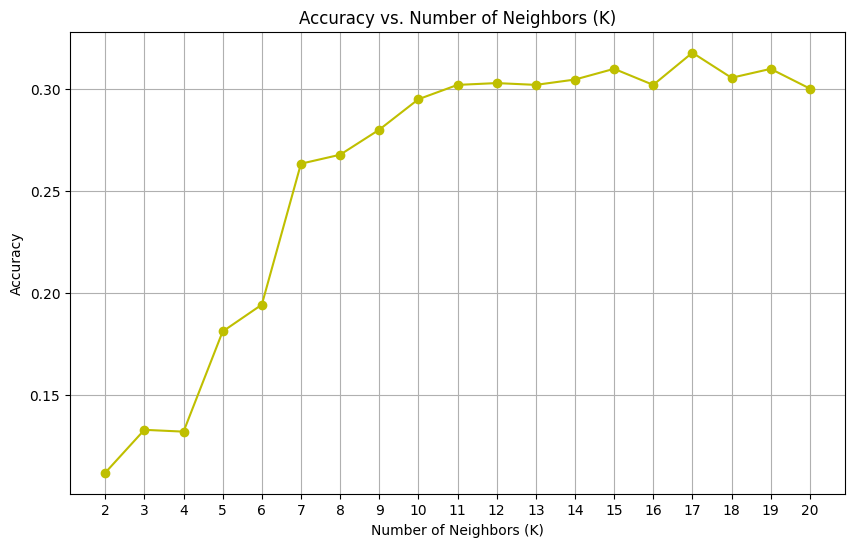

highest accuracy: 0.3176434536121964


In [8]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores = []
k_values = list(range(2, 21))
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, x1, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    accuracy_scores.append(mean_accuracy)
max=np.max(accuracy_scores)
for k, accuracy in zip(k_values, accuracy_scores):
    print(f'k={k}, Accuracy={accuracy:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='y')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 21, step=1))
plt.grid(True)
plt.show()
print("highest accuracy:",max)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=0.29,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",Accuracy)

Accuracy: 0.5572289156626506


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
x_train, x_test, y_train, y_test= train_test_split(x1,y, test_size=0.2, random_state=42)
print(x,x_train)
lg=Perceptron()
mm=lg.fit(x_train,y_train)
yp=mm.predict(x_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test= train_test_split(x1, y, test_size=0.20, random_state=42)
print(x1,x_train)
lg=SVC()
mm=lg.fit(x_train,y_train)
yp=mm.predict(x_test)
print(accuracy_score(yp,y_test))

[[ 8.04862036e+02 -1.82419563e+01  1.09658876e+00 ...  2.38845309e-03
  -1.09574504e-01  2.47165756e-02]
 [ 8.04084548e+02  1.70223563e+01  7.55093908e+00 ...  2.09015217e-01
   1.45338225e-01 -1.32216251e-01]
 [ 8.03006422e+02  2.15892794e+00  6.26448324e-01 ...  1.15473811e-01
   6.86305371e-02 -1.07720463e-01]
 ...
 [-7.89056686e+02  7.22409646e+00  1.34854620e+01 ... -2.20208870e-03
   1.30403829e-02  2.00794749e-02]
 [-7.90018649e+02  1.55896886e+01  1.87959743e+01 ...  1.12407908e-01
  -3.97179461e-02  3.54115004e-02]
 [-7.92056733e+02  7.24886655e+00  1.34756007e+01 ...  1.09581136e-01
  -5.07987464e-02  1.40490376e-01]] [[ 7.89338716e+02  5.44228499e+01  9.38127656e+00 ... -1.39049111e-01
   3.70017143e-02  8.19780639e-02]
 [-2.71283426e+02 -3.78807226e+01 -5.05776226e+00 ... -5.59712349e-02
   7.67349665e-02  3.98121720e-03]
 [-9.50686435e+01 -7.32115416e+00 -4.31690595e+00 ... -8.55439136e-02
  -1.41853817e-01  4.76908174e-03]
 ...
 [-7.75145550e+02 -1.54715071e+01 -4.9712138